,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,f,37.772004,-122.431619,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,38.925627,-77.034596,4,40.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             74111 non-null  float64
 1   property_type         74111 non-null  object 
 2   room_type             74111 non-null  object 
 3   amenities             74111 non-null  object 
 4   accommodates          74111 non-null  int64  
 5   bathrooms             73911 non-null  float64
 6   bed_type              74111 non-null  object 
 7   cancellation_policy   74111 non-null  object 
 8   cleaning_fee          74111 non-null  bool   
 9   city                  74111 non-null  object 
 10  instant_bookable      74111 non-null  object 
 11  latitude              74111 non-null  float64
 12  longitude             74111 non-null  float64
 13  number_of_reviews     74111 non-null  int64  
 14  review_scores_rating  57389 non-null  float64
 15  bedrooms           

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Valores faltantes después de la limpieza: review_scores_rating    22.563452
bathrooms                0.269865
beds                     0.176762
bedrooms                 0.122789
dtype: float64


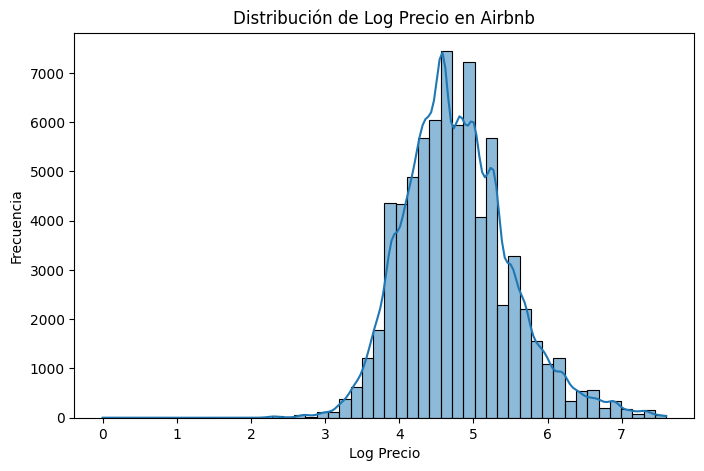

Cantidad de outliers en 'log_price': 1532


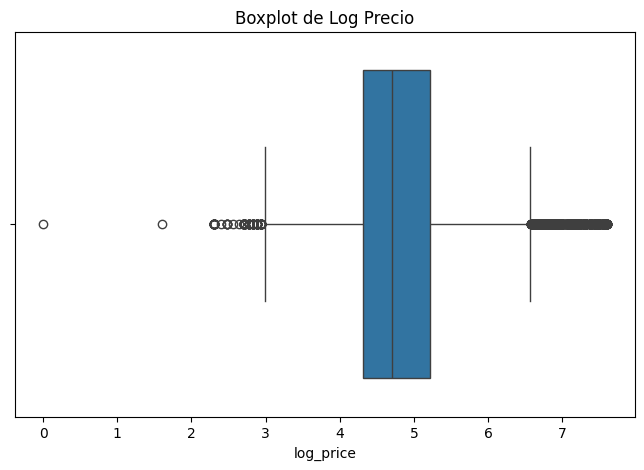

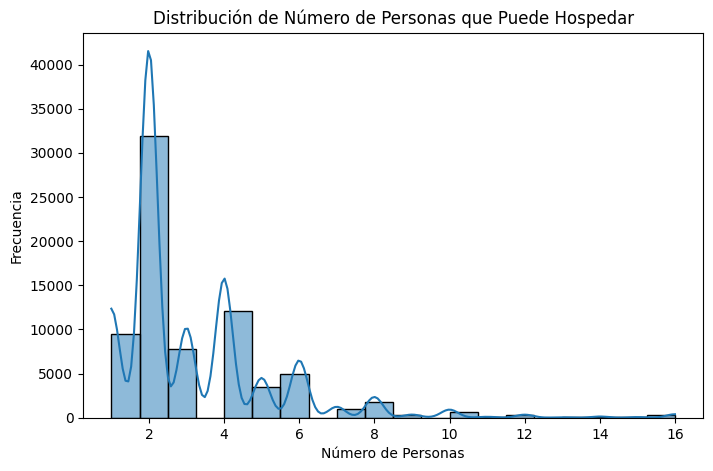

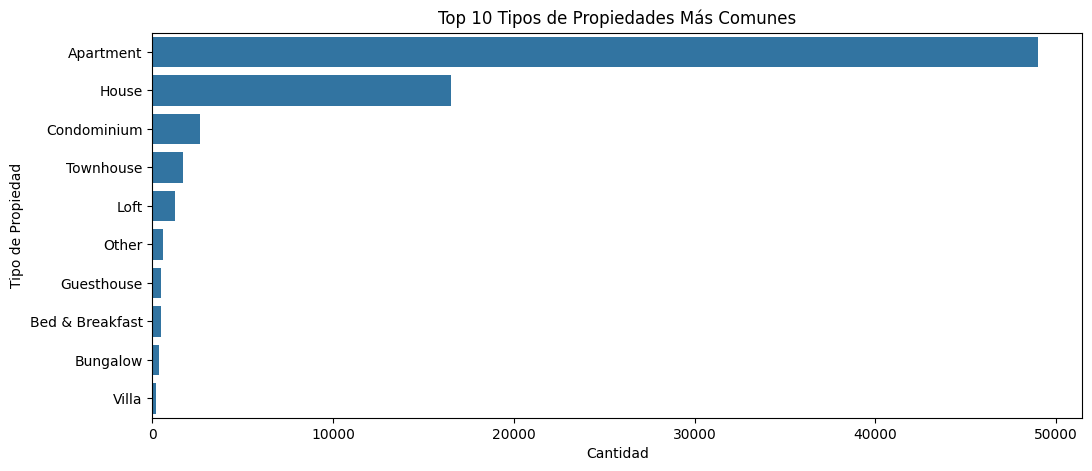

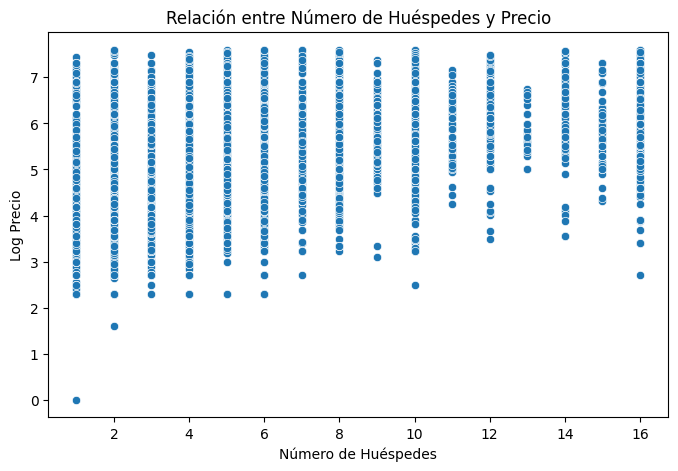

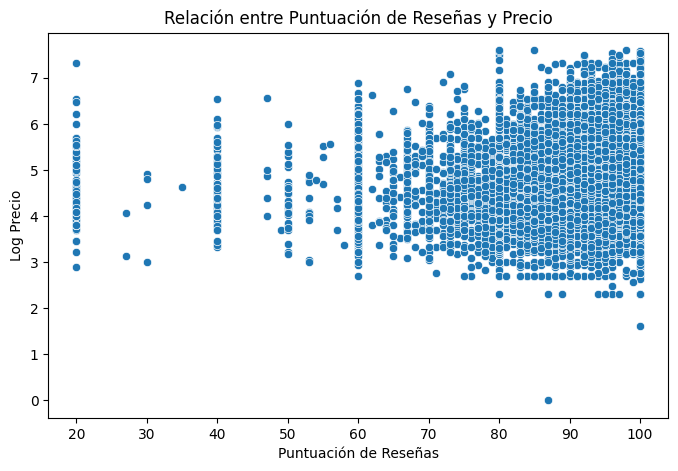

In [7]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/src")

#  Ahora podemos importar los scripts de 'src'
from data_wrangling import load_data, check_missing_values, detect_outliers

#  Ruta del dataset limpio
DATA_PATH = "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/data/processed/Airbnb_Cleaned.csv"

#  Cargar dataset limpio
df = load_data(DATA_PATH)

#  Ver primeras filas
display(df.head())

#  Información general del dataset
df.info()

#  Resumen estadístico de las variables numéricas
display(df.describe())

#  Verificar valores faltantes después de la limpieza
missing_values = check_missing_values(df)
print("Valores faltantes después de la limpieza:", missing_values)

#  Histograma de 'log_price'
plt.figure(figsize=(8,5))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title("Distribución de Log Precio en Airbnb")
plt.xlabel("Log Precio")
plt.ylabel("Frecuencia")
plt.show()

#  Detección de outliers en 'log_price'
outliers = detect_outliers(df, 'log_price')
print(f"Cantidad de outliers en 'log_price': {len(outliers)}")

#  Visualización de outliers con Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['log_price'])
plt.title("Boxplot de Log Precio")
plt.show()

#  Distribución de 'accommodates' (Número de personas que pueden hospedarse)
plt.figure(figsize=(8,5))
sns.histplot(df['accommodates'], bins=20, kde=True)
plt.title("Distribución de Número de Personas que Puede Hospedar")
plt.xlabel("Número de Personas")
plt.ylabel("Frecuencia")
plt.show()

#  Tipos de Propiedad más comunes
plt.figure(figsize=(12,5))
sns.countplot(y=df['property_type'], order=df['property_type'].value_counts().index[:10])
plt.title("Top 10 Tipos de Propiedades Más Comunes")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Propiedad")
plt.show()

#  Relación entre 'log_price' y 'accommodates'
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['accommodates'], y=df['log_price'])
plt.title("Relación entre Número de Huéspedes y Precio")
plt.xlabel("Número de Huéspedes")
plt.ylabel("Log Precio")
plt.show()

#  Relación entre 'log_price' y 'review_scores_rating'
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['review_scores_rating'], y=df['log_price'])
plt.title("Relación entre Puntuación de Reseñas y Precio")
plt.xlabel("Puntuación de Reseñas")
plt.ylabel("Log Precio")
plt.show()
